In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data

df = pd.read_csv('Dataset_Processing.csv')
df

,Unnamed: 0,transalted,polarity,subjectivity,sentiment,label,neg,pos,compound,punct,tokenized,nonstop,stemmed
0,0,Indonesia Close the entrance for this country ...,0.000000,0.000000,positive,1,0.000,0.098,0.4278,Indonesia Close the entrance for this country ...,"['indonesia', 'close', 'the', 'entrance', 'for...","['indonesia', 'close', 'entrance', 'country', ...","['indonesia', 'close', 'entranc', 'countri', '..."
1,1,Which country is prohibited by Indonesia Berit...,0.000000,0.000000,positive,1,0.000,0.000,0.0000,Which country is prohibited by Indonesia Berit...,"['which', 'country', 'is', 'prohibited', 'by',...","['country', 'prohibited', 'indonesia', 'berita...","['countri', 'prohibit', 'indonesia', 'beritaci..."
2,2,What are the unusual symptoms Omicron BeritaCi...,0.200000,1.000000,positive,1,0.000,0.000,0.0000,What are the unusual symptoms Omicron BeritaCi...,"['what', 'are', 'the', 'unusual', 'symptoms', ...","['unusual', 'symptoms', 'omicron', 'beritacini...","['unusu', 'symptom', 'omicron', 'beritacini', ..."
3,3,sange ni vcs yuk anyone who wants to accompany...,0.200000,0.100000,positive,1,0.000,0.000,0.0000,sange ni vcs yuk anyone who wants to accompany...,"['sange', 'ni', 'vcs', 'yuk', 'anyone', 'who',...","['sange', 'ni', 'vcs', 'yuk', 'anyone', 'wants...","['sang', 'ni', 'vc', 'yuk', 'anyon', 'want', '..."
4,4,Albert Informative Land Fertile But Life Doesn...,0.000000,0.000000,positive,1,0.000,0.000,0.0000,Albert Informative Land Fertile But Life Doesn...,"['albert', 'informative', 'land', 'fertile', '...","['albert', 'informative', 'land', 'fertile', '...","['albert', 'inform', 'land', 'fertil', 'life',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,2171,The government plans to provide BSU subsidy as...,0.000000,0.000000,negative,0,0.082,0.000,-0.1531,The government plans to provide BSU subsidy as...,"['the', 'government', 'plans', 'to', 'provide'...","['government', 'plans', 'provide', 'bsu', 'sub...","['govern', 'plan', 'provid', 'bsu', 'subsidi',..."
2172,2172,ahead of the Christmas and New Year holidays 2...,0.090909,0.511364,positive,1,0.000,0.129,0.6369,ahead of the Christmas and New Year holidays ...,"['ahead', 'of', 'the', 'christmas', 'and', 'ne...","['ahead', 'christmas', 'new', 'year', 'holiday...","['ahead', 'christma', 'new', 'year', 'holiday'..."
2173,2173,When Schoolkite Go to Unicorn Valuation of the...,0.000000,0.000000,positive,1,0.000,0.037,0.0258,When Schoolkite Go to Unicorn Valuation of the...,"['when', 'schoolkite', 'go', 'to', 'unicorn', ...","['schoolkite', 'go', 'unicorn', 'valuation', '...","['schoolkit', 'go', 'unicorn', 'valuat', 'comp..."
2174,2174,Regent targets this week Kendal Level 1 Covid ...,0.000000,0.000000,positive,1,0.000,0.000,0.0000,Regent targets this week Kendal Level Covid ...,"['regent', 'targets', 'this', 'week', 'kendal'...","['regent', 'targets', 'week', 'kendal', 'level...","['regent', 'target', 'week', 'kendal', 'level'..."


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
print("Training data size : ", train_df.shape)
print("Test data size : ", test_df.shape)

Training data size :  (1740, 13)
Test data size :  (436, 13)


In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [6]:
top_words = 10000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(train_df['transalted'])
list_tokenized_train = tokenizer.texts_to_sequences(train_df['transalted'])

max_review_length = 200
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
y_train = train_df['label']

In [7]:
df['sentiment'].value_counts()

positive    1998
negative     178
Name: sentiment, dtype: int64

In [8]:
from keras.models import Model, Sequential
from keras.layers import Embedding , LSTM, Conv1D, MaxPooling1D, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
# our_callbacks = [EarlyStopping(monitor="accuracy", patience=5, min_delta=0.001, mode="max"),
#                 ModelCheckpoint(filepath="dbms_model_cnn_lstm.h5", save_best_only=True, save_weights_only=False)]

# Modeling

In [10]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(32, 2, name="Conv1", padding="same"))
model.add(MaxPooling1D(name="MaxPool1"))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320032    
                                                                 
 Conv1 (Conv1D)              (None, 200, 32)           2080      
                                                                 
 MaxPool1 (MaxPooling1D)     (None, 100, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 375,413
Trainable params: 375,413
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train,y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
22/22 [==============================] - 8s 214ms/step - loss: 0.4376 - accuracy: 0.9181 - val_loss: 0.3042 - val_accuracy: 0.9109
Epoch 2/10
22/22 [==============================] - 4s 193ms/step - loss: 0.2761 - accuracy: 0.9203 - val_loss: 0.2899 - val_accuracy: 0.9109
Epoch 3/10
22/22 [==============================] - 4s 183ms/step - loss: 0.2466 - accuracy: 0.9203 - val_loss: 0.2528 - val_accuracy: 0.9109
Epoch 4/10
22/22 [==============================] - 4s 192ms/step - loss: 0.1641 - accuracy: 0.9239 - val_loss: 0.1903 - val_accuracy: 0.9253
Epoch 5/10
22/22 [==============================] - 4s 195ms/step - loss: 0.0763 - accuracy: 0.9792 - val_loss: 0.2242 - val_accuracy: 0.9339
Epoch 6/10
22/22 [==============================] - 4s 197ms/step - loss: 0.0331 - accuracy: 0.9914 - val_loss: 0.2371 - val_accuracy: 0.9339
Epoch 7/10
22/22 [==============================] - 4s 184ms/step - loss: 0.0113 - accuracy: 0.9978 - val_loss: 0.2398 - val_accuracy: 0.9310
Epoch 

In [12]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score

list_tokenized_test = tokenizer.texts_to_sequences(test_df['sentiment'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_df['label']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
#print(y_pred)
#print(y_test)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1-score: ', f1_score(y_pred, y_test))
print('precision_score: ', precision_score(y_pred, y_test))
print('recall_score: ', recall_score(y_pred, y_test))

Accuracy of the model :  0.9174311926605505
F1-score:  0.9569377990430622
precision_score:  1.0
recall_score:  0.9174311926605505


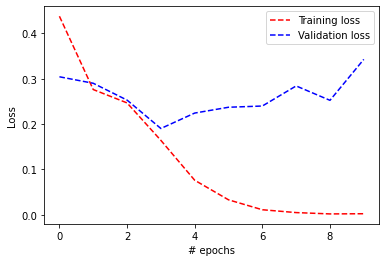

In [13]:
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel("# epochs")
plt.ylabel("Loss")
plt.show()